In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

os.getcwd()
hc = pd.read_csv('train.csv')
print(hc.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### Data Evaluation

In [2]:
# Understand the data set information and look for any null values
hc.shape

(1460, 81)

In [3]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
hc.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# find the number of null values in the data

# Find columns with missing values
cols_with_missing = hc.columns[hc.isnull().any()]

# Calculate percentage of missing values for each column
missing_percentage = (hc[cols_with_missing].isnull().sum() / len(hc)) * 100

# Sort columns by percentage of missing values in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

#### Many parameters are having missing values, need to clean up the data which are having higher null values.


### Data Cleanup

In [6]:
#Checking for outlier in the numerical columns
hc.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [7]:
# Lets check the missing data
missing_data = hc.isnull().sum().sort_values(ascending=True)
missing_data_percent = (missing_data / hc.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(85)

,Total,Percent
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
3SsnPorch,0,0.000000
Alley,1369,0.937671
BedroomAbvGr,0,0.000000
BldgType,0,0.000000
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinSF1,0,0.000000
BsmtFinSF2,0,0.000000


####  PoolQC, MiscFeature, Alley are not contrbuting to the sale price, hence dropping it.


In [8]:
#Drop the parameters which are having more then 90% of null values.
hc.drop(['Alley','PoolQC','MiscFeature','Id'],axis=1,inplace = True)
hc.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


#### Since there are different percentage of null data in parameters, Lets use drop and impute function.

In [9]:
# List of columns with meaningful missing values
cols_with_meaningful_missing = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", 
                                "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", 
                                "GarageFinish", "GarageQual", "GarageCond", "Fence","LotFrontage","GarageYrBlt","MasVnrArea","Electrical"]

# Fill missing values with "none" for columns with meaningful missing values
hc[cols_with_meaningful_missing] = hc[cols_with_meaningful_missing].fillna("none")

# Find columns with missing values
cols_with_missing = hc.columns[hc.isnull().any()]

# Calculate percentage of missing values for each column
missing_percentage = (hc[cols_with_missing].isnull().sum() / len(hc)) * 100

# Sort columns by percentage of missing values in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage

Series([], dtype: float64)

### Check if the datas are corelated and cleanup for further processing

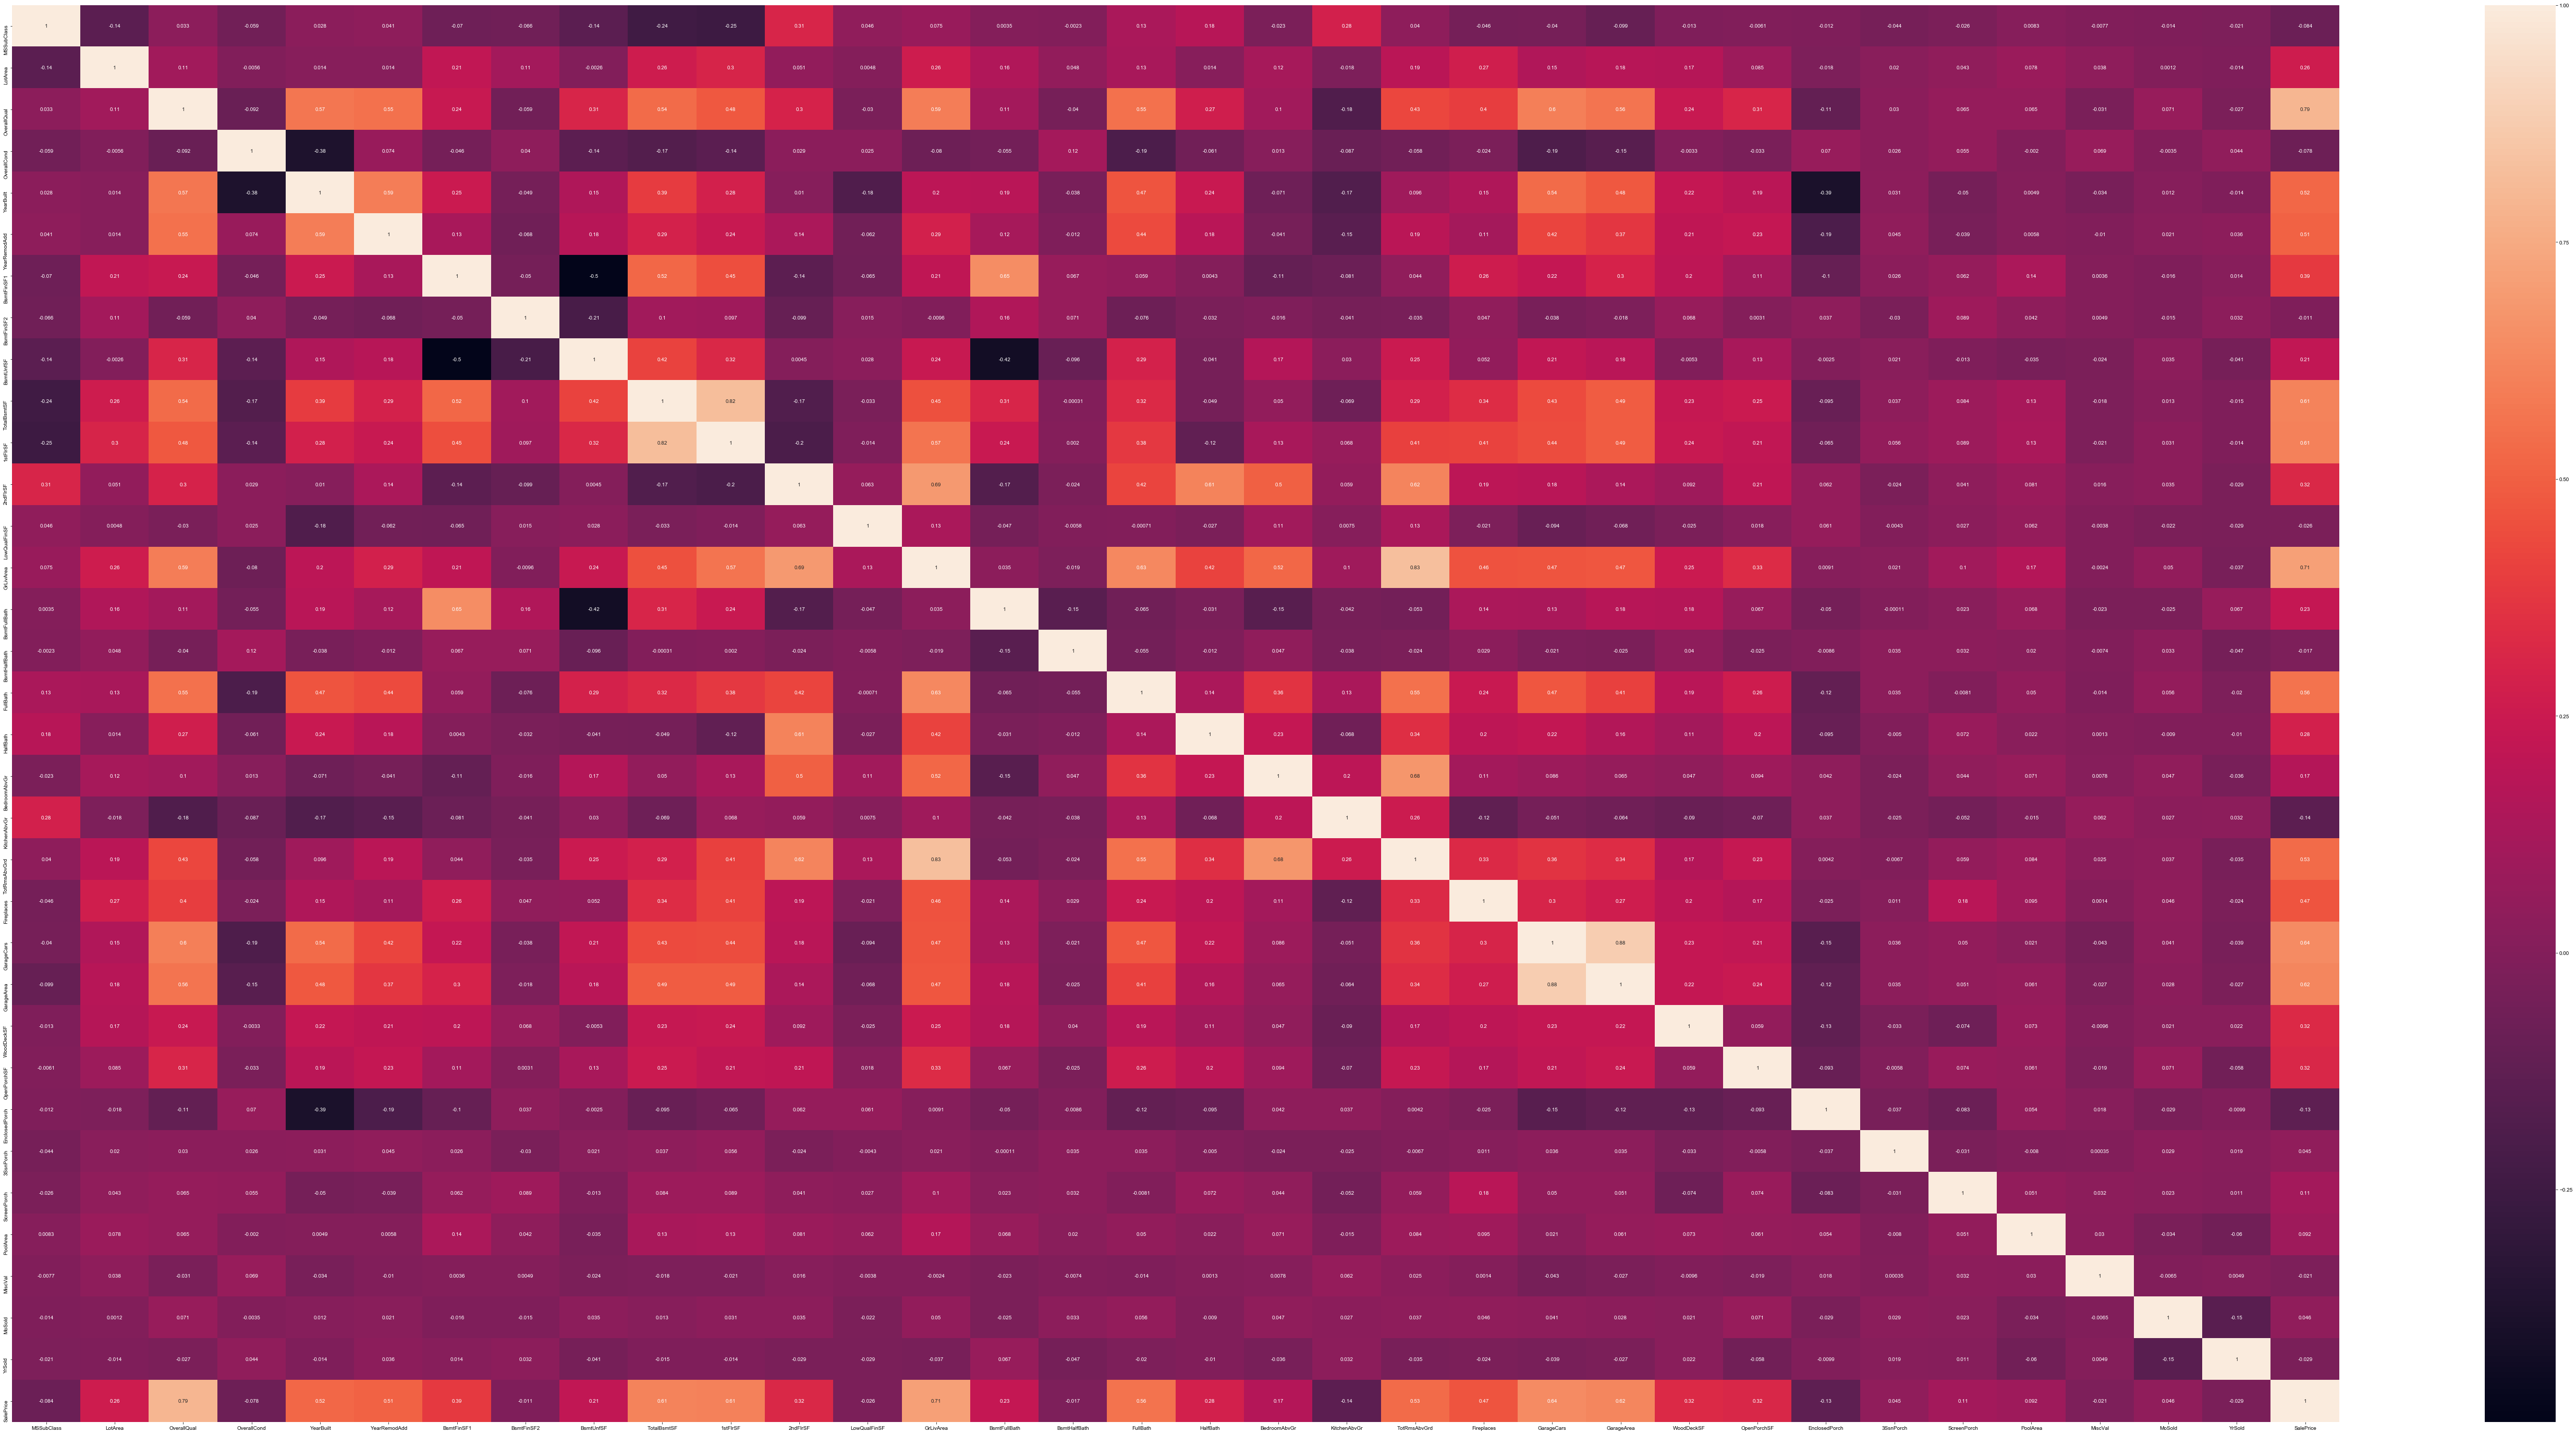

In [10]:
# Select columns for correlation analysis
plt.figure(figsize = (100,50))
sns.heatmap(hc.corr(),annot=True)

# Set font scale for heatmap
sns.set(font_scale=1.25)

plt.show()


#### Lets take the parameters which are highly corelated to the sale price.

In [11]:
no_param = 15
corelated_columns = hc.corr().nlargest(no_param , 'SalePrice')['SalePrice'].index
print(corelated_columns)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF'],
      dtype='object')


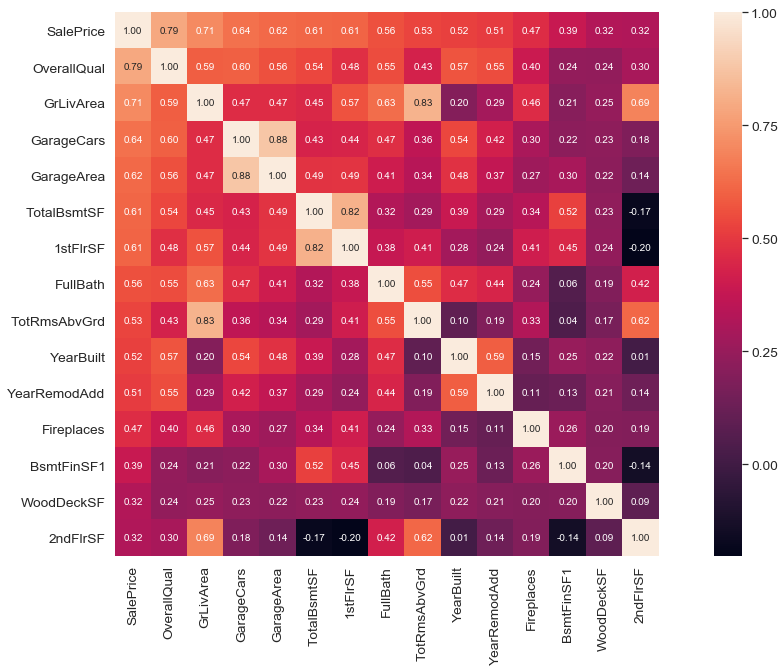

In [12]:
#  Plot the heatmap for the higly corelated data's with sale price
# Select columns for correlation analysis
filtered_data = np.corrcoef(hc[corelated_columns].values.T)
plt.figure(figsize = (20,10))

# Set font scale for heatmap
sns.set(font_scale=1.25)
sns.heatmap(filtered_data, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=corelated_columns.values, xticklabels=corelated_columns.values)

plt.show()

#### From the above heat map it is evident that the following parameters are contributing to the overall sale proce
1. **OverallQual(0.79)**
2. **GrLivArea(0.71)**
3. **GarageCars(0.64)**

In [13]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non

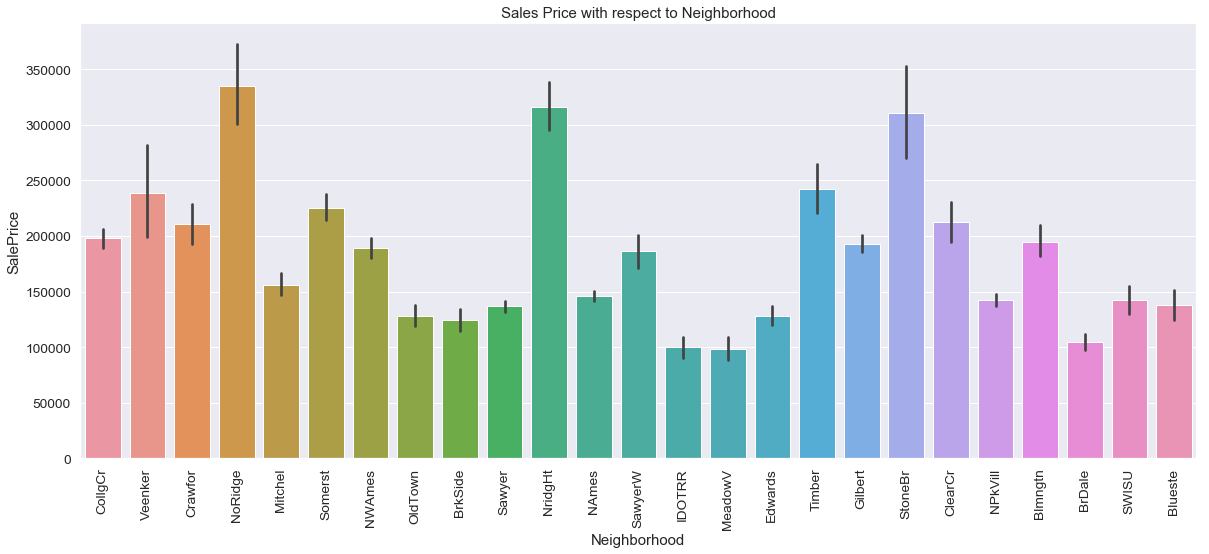

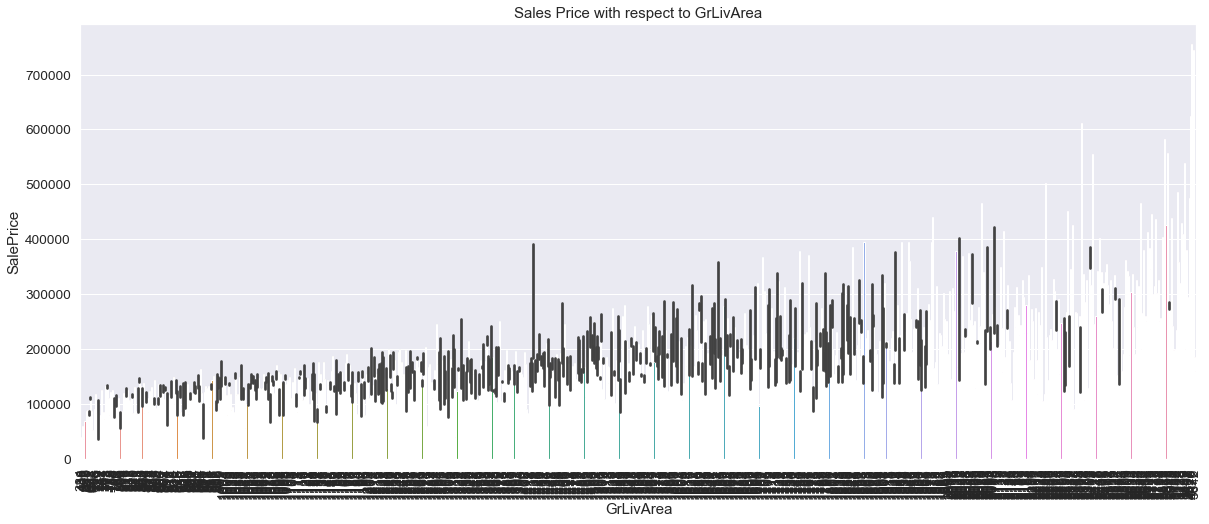

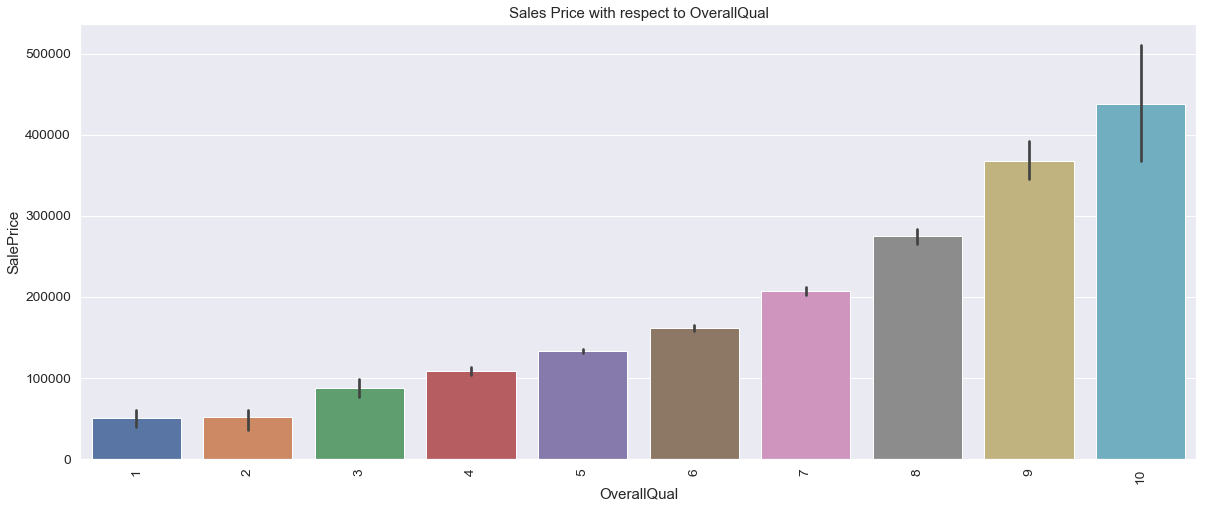

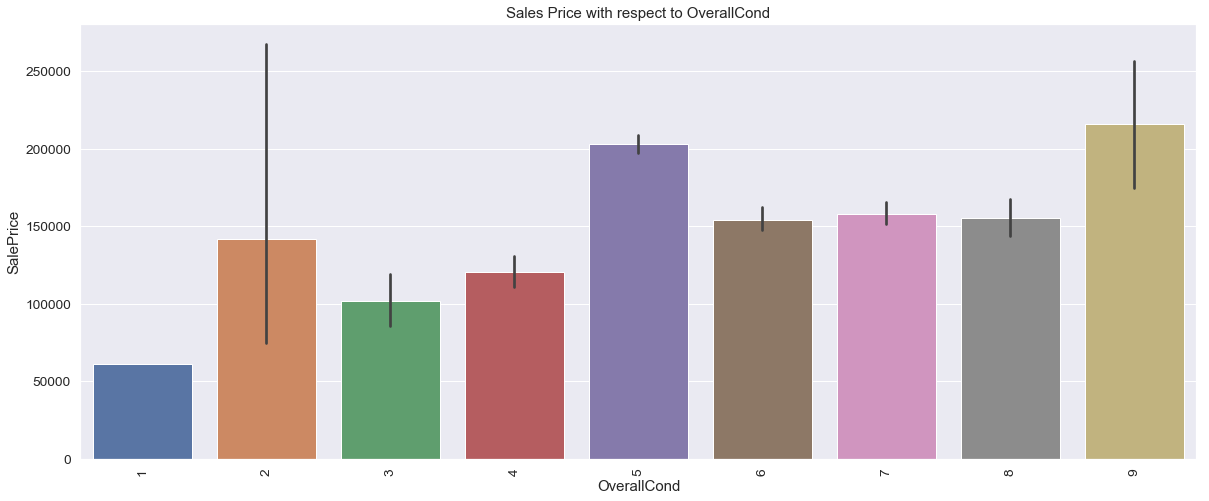

In [14]:
# Plot the categorical column data and understand the data details


# Define the list of x-values to plot
x_values = ["Neighborhood", "GrLivArea", "OverallQual", "OverallCond"]

# Iterate through each x-value and plot the bar chart
for x in x_values:
    plt.figure(figsize=(20, 8))
    sns.barplot(x=x, y="SalePrice", data=hc)
    plt.title(f"Sales Price with respect to {x}")
    plt.xticks(rotation=90)
    plt.show()


### Summary
Based the abover graph and comparison the following parameters are having direct impact on the sale price:
1. Location-NoRidge,Nridght,Stonebr
2. Overall Quality
3. Overall Condition

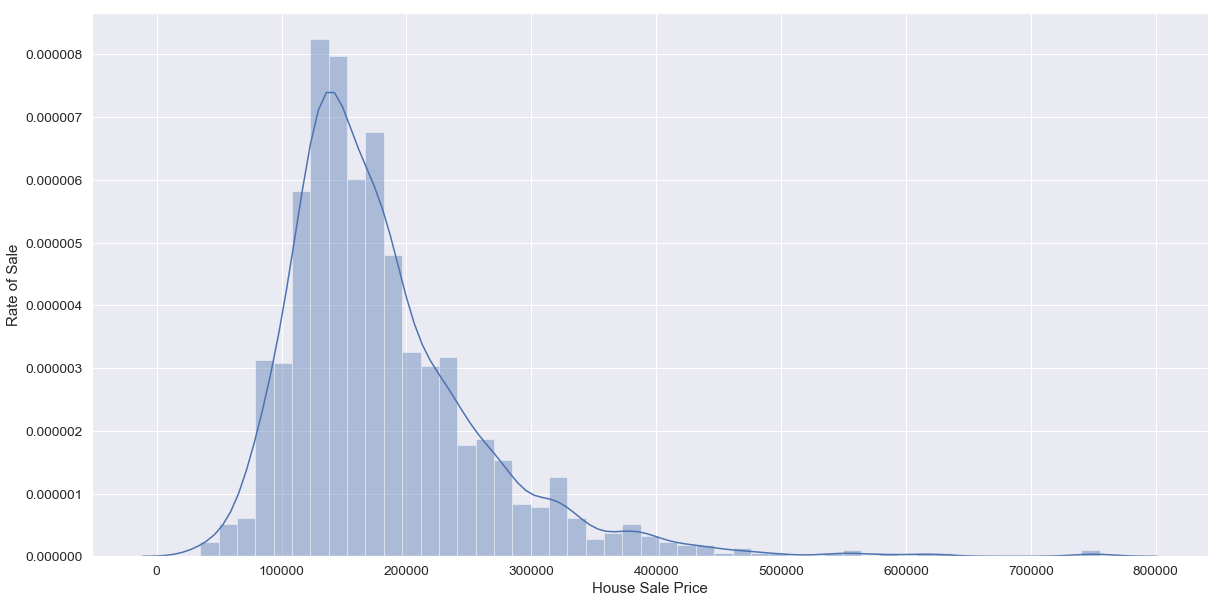

In [15]:
import matplotlib.pyplot as pt
import seaborn as sb

fig, ax = pt.subplots(figsize=(20, 10))
sb.distplot(hc["SalePrice"], ax=ax)
ax.set_xlabel("House Sale Price", fontsize=15)
ax.set_ylabel("Rate of Sale", fontsize=15)

pt.show()

#### The sale price data is almost in normal distribution

### Data Tuning

In [16]:
# Check if the property age contributes to the sale price


# create a new column 'Age' by subtracting 'YearBuilt' from 'YrSold'
hc['Age'] = hc['YrSold'] - hc['YearBuilt']

# drop 'YearBuilt' and 'YrSold' columns
hc = hc.drop(['YearBuilt', 'YrSold'], axis=1)

# view the updated dataframe
print(hc.head())



   MSSubClass MSZoning LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL          65     8450   Pave      Reg         Lvl   
1          20       RL          80     9600   Pave      Reg         Lvl   
2          60       RL          68    11250   Pave      IR1         Lvl   
3          70       RL          60     9550   Pave      IR1         Lvl   
4          60       RL          84    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea Fence  \
0    AllPub    Inside       Gtl  ...         0           0        0  none   
1    AllPub       FR2       Gtl  ...         0           0        0  none   
2    AllPub    Inside       Gtl  ...         0           0        0  none   
3    AllPub    Corner       Gtl  ...         0           0        0  none   
4    AllPub       FR2       Gtl  ...         0           0        0  none   

  MiscVal  MoSold  SaleType  SaleCondition SalePrice Age  
0       0       2        WD

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121]), <a list of 122 Text xticklabel objects>)

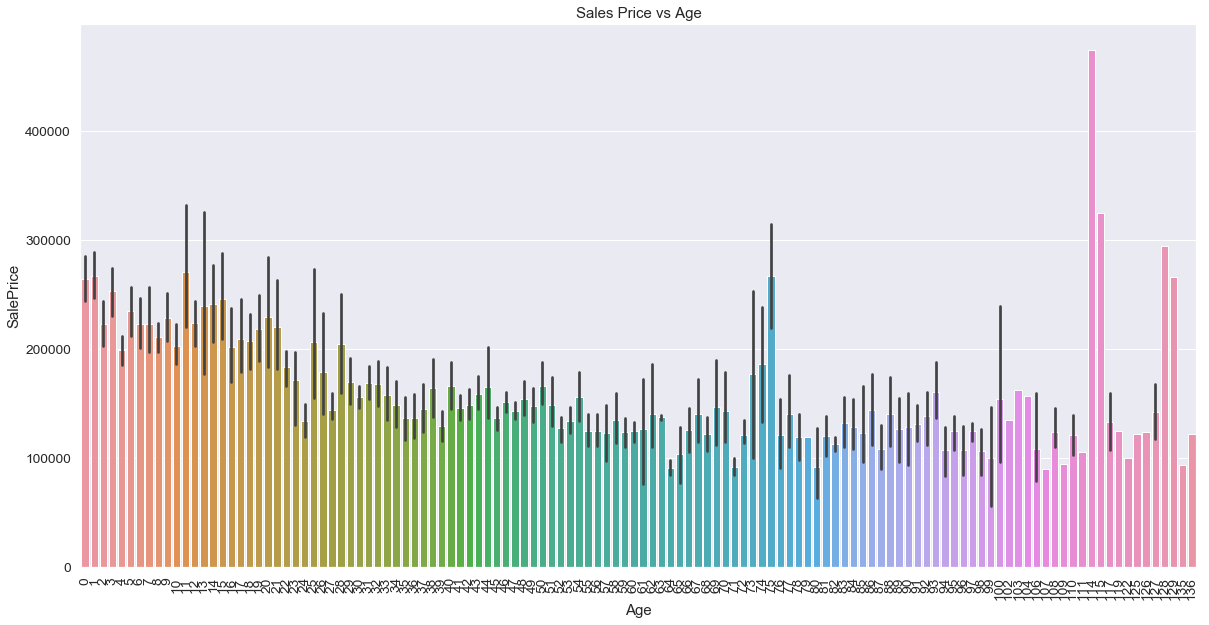

In [17]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Age", y="SalePrice", data= hc)
plt.title("Sales Price vs Age")
plt.xticks(rotation=90)

In [18]:
#  Remove the closely correlated and the parameters which doesnot make much impact on the sale price. 
hc.drop(['MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional'], axis = 1, inplace = True)


In [19]:
## Extract numerical columns
hc_num = hc.select_dtypes(include=['int64', 'float64'])
hc_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,Age
0,60,8450,7,5,2003,706,0,150,856,856,...,548,0,61,0,0,0,0,2,208500,5
1,20,9600,6,8,1976,978,0,284,1262,1262,...,460,298,0,0,0,0,0,5,181500,31
2,60,11250,7,5,2002,486,0,434,920,920,...,608,0,42,0,0,0,0,9,223500,7
3,70,9550,7,5,1970,216,0,540,756,961,...,642,0,35,272,0,0,0,2,140000,91
4,60,14260,8,5,2000,655,0,490,1145,1145,...,836,192,84,0,0,0,0,12,250000,8


In [20]:
# check for the outliers in numerical columns

hc_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,180921.195890,36.547945
std,42.300571,9981.264932,1.382997,1.112799,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,79442.502883,30.250152
min,20.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,8.000000
50%,50.000000,9478.500000,6.000000,5.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,35.000000
75%,70.000000,11601.500000,7.000000,6.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,54.000000
90%,120.000000,14381.700000,8.000000,7.000000,2006.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,...,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,84.000000
95%,160.000000,17401.150000,8.000000,8.000000,2007.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,...,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,11.000000,326100.000000,91.000000
99%,190.000000,37567.640000,10.000000,9.000000,2009.000000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,...,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,12.000000,442567.010000,110.410000


In [21]:
# Cleaup outliers for in numerical data


# Define the list of column names to remove outliers from
num_data = ['GrLivArea']

# Loop through the columns and remove outliers using the IQR method
for col in num_data:
    quartile_1, quartile_3 = hc[col].quantile([0.05, 0.95])
    interquartile_range = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * interquartile_range
    upper_bound = quartile_3 + 1.5 * interquartile_range
    hc = hc[(hc[col] >= lower_bound) & (hc[col] <= upper_bound)]


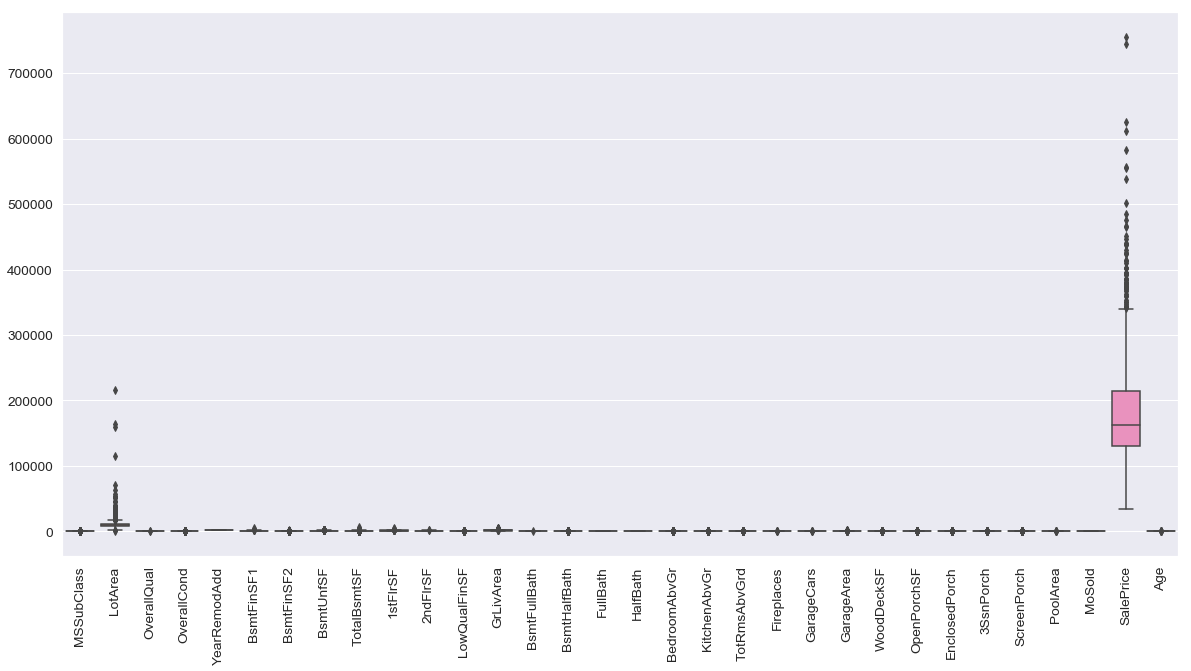

In [22]:
# check outliers in numerical columns
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.boxplot(data=hc_num)

In [23]:
hc.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
                ..
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [24]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 69 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
MasVnrArea       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 no

#### Analyse the categorical data and add the dummies wherever required.

In [25]:
# Get the data types of all columns
types = hc.dtypes

# Select numeric columns by filtering for int or float data types
numeric_columns = list(types[(types == 'int64') | (types == 'float')].index)

# Select categorical columns by filtering for object data type
categorical_columns = list(types[types == 'object'].index)

# Print the lists of numerical and categorical columns
print('Numerical columns:', numeric_columns)
print('Categorical columns:', categorical_columns)


Numerical columns: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice', 'Age']
Categorical columns: ['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


In [26]:
# Create dummies

hc = pd.get_dummies(hc, drop_first=True )
hc.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2002,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1970,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [27]:
hc.shape

(1459, 747)

## Develop Model

In [28]:
# Define features and target variable


X = hc
# y = np.log(X.SalePrice)
y = hc["SalePrice"]
X = hc.drop("SalePrice", axis=1)
y.head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [29]:
X = X.fillna(X.interpolate())

In [30]:
# Check if any null values are present

col_mask=X.isnull().any(axis=0)
row_mask=X.isnull().any(axis=1)
X.loc[row_mask,col_mask]

""


In [31]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hc)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
# Split into test and train data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [33]:
## View dimensions of the train data
print(X_train.shape)
print(y_train.shape)

(1021, 746)
(1021,)


In [34]:
## View dimensions of the test data
print(X_test.shape)
print(y_test.shape)

(438, 746)
(438,)


In [35]:
# Define numerical columns to be scaled
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a scaler instance and fit_transform X_train
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform X_test using the scaler fitted on X_train
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [36]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.766073,-0.042320,-0.789413,-0.513945,-0.353590,-0.984488,-0.299624,-1.263713,-2.402963,0.348208,...,0,0,0,0,0,0,0,0,1,0
1416,3.130523,0.075318,-1.503944,0.393906,-1.645494,-0.984488,-0.299624,0.470838,-0.629470,0.202605,...,0,0,0,0,1,0,0,0,1,0
390,-0.179708,-0.208853,-0.789413,2.209607,-1.645494,-0.439492,1.981805,-0.752501,-0.437741,-0.538408,...,0,0,0,0,1,0,0,0,1,0
877,0.056738,-0.167317,2.068711,-0.513945,0.986162,1.661342,-0.299624,-0.611862,0.934034,0.764215,...,0,0,0,0,1,0,0,0,1,0
567,-0.889043,-0.037867,0.639649,-0.513945,0.938314,-0.979965,-0.299624,2.118326,1.059571,0.954019,...,0,0,0,0,1,0,0,0,1,0


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', 'LotFrontage_46.0', 'LotFrontage_49.0',
       'LotFrontage_84.0', 'LotFrontage_91.0', 'LotFrontage_98.0',
       'LotFrontage_103.0', 'LotFrontage_107.0', 'LotFrontage_110.0',
       'LotFrontage_118.0', 'LotFrontage_129.0', 'LotFrontage_150.0',
       'LotFrontage_160.0', 'LotFrontage_182.0', 'Utilities_NoSeWa',
       'LotConfig_FR3', 'Condition1_RRNn', 'RoofStyle_Shed',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'MasVnrArea_34.0', 'MasVnrArea_42.0',
       'MasVnrArea_46.0', 'MasVnrArea_50.0', 'MasVnrArea_60.0',
       'MasVnrArea_86.0', 'MasVnrArea_95.0', 'MasVnrArea_96.0',
       'MasVnrArea_113.0', 'MasVnrArea_117.0', 'MasVnrArea_123.0',
       'MasVnrArea_146.0', 'MasVnrArea_150.0', 'MasVnrArea_163.0',
       'MasVnrArea_165.0', 'MasVnrArea_176.0', 'MasVnrArea_186.0',
       'MasVnrArea_200.0', 'MasVnrArea_248.0', 'MasVnrArea_256.0',
       'MasVnrArea_262.0', 'MasVnrArea_270.0', 'MasVnrArea_296.

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

X_train_rfe = pd.DataFrame(X_train[col])

X_train_rfe.head()


,TotalBsmtSF,LotFrontage_46.0,LotFrontage_49.0,LotFrontage_84.0,LotFrontage_91.0,LotFrontage_98.0,LotFrontage_103.0,LotFrontage_107.0,LotFrontage_110.0,LotFrontage_118.0,...,GarageYrBlt_2010.0,GarageYrBlt_none,GarageFinish_none,GarageQual_Gd,GarageQual_TA,GarageQual_none,SaleType_CWD,SaleType_Con,SaleType_New,SaleCondition_Partial
984,-2.402963,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1416,-0.629470,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
390,-0.437741,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
877,0.934034,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
567,1.059571,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 233),
 ('LotArea', False, 157),
 ('OverallQual', False, 192),
 ('OverallCond', False, 144),
 ('YearRemodAdd', False, 550),
 ('BsmtFinSF1', False, 214),
 ('BsmtFinSF2', False, 452),
 ('BsmtUnfSF', False, 453),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 35),
 ('2ndFlrSF', False, 3),
 ('LowQualFinSF', False, 457),
 ('GrLivArea', False, 400),
 ('BsmtFullBath', False, 487),
 ('BsmtHalfBath', False, 635),
 ('FullBath', False, 445),
 ('HalfBath', False, 561),
 ('BedroomAbvGr', False, 505),
 ('KitchenAbvGr', False, 405),
 ('TotRmsAbvGrd', False, 601),
 ('Fireplaces', False, 416),
 ('GarageCars', False, 569),
 ('GarageArea', False, 165),
 ('WoodDeckSF', False, 465),
 ('OpenPorchSF', False, 518),
 ('EnclosedPorch', False, 522),
 ('3SsnPorch', False, 524),
 ('ScreenPorch', False, 554),
 ('PoolArea', False, 431),
 ('MoSold', False, 566),
 ('Age', False, 132),
 ('MSZoning_FV', False, 18),
 ('MSZoning_RH', False, 20),
 ('MSZoning_RL', False, 19),
 ('MSZoning_RM', False, 2

### Evaluate with Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-18222485998909.977
[-6.66674034e+03  7.59258573e+03  7.73465408e+03  7.08312212e+03
  1.41810296e+03 -2.38196221e+17 -9.23168116e+16 -2.41293135e+17
  2.35994877e+17 -1.26187352e+17 -1.43570950e+17 -1.55708760e+16
  1.70095755e+17  2.24800000e+03  1.76000000e+02  3.28000000e+03
  3.80000000e+02 -1.35200000e+03 -3.28000000e+03 -2.40000000e+02
  3.00700000e+03  4.16000000e+02  5.77200000e+03  2.34050000e+03
  1.35600000e+03  1.36000000e+03  8.92000000e+02  5.56000000e+02
 -4.11654431e+14  5.88000000e+02 -9.09600000e+03  3.26520000e+04
  3.28325000e+04  3.12640000e+04  2.17200000e+04 -1.37480000e+04
 -1.80775000e+03 -3.95200000e+03  5.18992327e+17 -4.28000000e+02
  8.17200000e+03 -4.00300000e+03  1.58260000e+04 -6.50350000e+03
 -3.31480000e+04 -1.41350000e+04 -1.62700000e+04 -3.15965000e+04
 -5.75400000e+03 -4.44500000e+03 -1.72520000e+04  1.45177158e+17
  1.24490000e+04 -1.34090000e+04  2.83422500e+04 -4.91200000e+03
 -1.32700000e+04 -3.56000000e+03 -1.62880000e+04 -9.65000000e+02
 -1.4

In [42]:
# Define a function to calculate metrics
def calc_metrics(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    rss_train = np.sum(np.square(y_train - y_pred_train))
    rss_test = np.sum(np.square(y_test - y_pred_test))
    
    rmse_train = mean_squared_error(y_train, y_pred_train)**0.5
    rmse_test = mean_squared_error(y_test, y_pred_test)**0.5
    
    return [r2_train, r2_test, rss_train, rss_test, rmse_train, rmse_test]


# Call the function on ridge regression model
metric_lm = calc_metrics(lm, X_train, y_train, X_test, y_test)

# Print the metrics
for metric in metric_lm:
    print(metric)


0.9847436040244296
-1.2723367643486855e+23
103634794790.80179
3.0674610997936474e+35
10074.880993009903
2.6463816512887428e+16


### The values in linear regression is over fitting, as the data set performs different in Train and Test, lets check for other regression models

### Evaluate with Ridge Regression

In [43]:

# Define a list of alpha values to test
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]

# Create an instance of the Ridge Regression model
ridge = Ridge()

# Define the grid search parameters
param_grid = {'alpha': alphas}

# Create an instance of the GridSearchCV object
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           return_train_score=True,
                           verbose=1,
                           n_jobs=-1)


# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:   11.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [44]:
#checking the value of optimum number of parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 20}
-16733.839568272262


In [45]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-5.38959009e+03  3.91755573e+03  1.30706144e+04  7.71957238e+03
  2.19371128e+03  8.55918121e+03  1.60889185e+03  1.94490513e+03
  1.12569589e+04  5.02766713e+03  1.29045044e+04 -2.25199734e+03
  1.44158470e+04  2.17932277e+03 -6.07169531e+02  2.28919782e+03
  8.31450627e+02 -4.42289044e+03 -3.95148718e+03  4.28674986e+03
  5.42135880e+03  4.84117270e+03  3.56683114e+03  1.63167388e+03
 -7.61653637e+02 -3.50665709e+02  9.88317463e+02  9.21950676e+02
  4.93213870e+03 -1.51920865e+03 -9.25952113e+03  3.38505017e+03
  2.11088533e+03  3.65216639e+03 -2.78730612e+03 -1.76522421e+03
  8.31409209e+02 -1.72548430e+03  0.00000000e+00 -1.61291034e+02
  1.67292281e+02 -1.78424690e+03 -7.16845927e+02  3.03313817e+01
 -1.79754275e+02 -7.28627994e+02 -1.34882405e+03 -1.51015673e+03
 -2.51584427e+03 -1.74539317e+03  1.06177011e+03  3.82326792e+02
  7.48268007e+02 -4.75774262e+02  3.87379651e+03 -6.46573871e+02
 -2.59904871e+03  1.15011806e+03 -3.79625303e+03  1.09368676e+03
  1.96642851e+03  1.96685

In [46]:
# Call the function on ridge regression model
metric_ridge = calc_metrics(ridge, X_train, y_train, X_test, y_test)

# Print the metrics
for metric in metric_ridge:
    print(metric)


0.9280648085769806
0.8559866331590271
488646782195.42285
347200059774.37354
21876.843024538448
28154.82552597535


#### Based on the above evaluation with the "R2"(Train = 0.958424605441041,Test = 0.9144670043338604), the best alpha fit is "6"

In [47]:
cross_validation = pd.DataFrame(grid_search.cv_results_)
cross_validations = cross_validation[cross_validation['param_alpha']<=1000]
cross_validation.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052655,0.009478,0.003018,0.000603,0.0001,{'alpha': 0.0001},-29251.408277,-26334.078843,-31820.079686,-24184.776229,...,-27743.375715,2604.265479,26,-5649.342391,-5510.422704,-5037.401507,-5932.840483,-5327.052984,-5491.412014,301.098633
1,0.073637,0.019330,0.003282,0.000420,0.001,{'alpha': 0.001},-28509.617998,-26174.246969,-31074.731742,-23968.407771,...,-27315.298458,2377.610682,25,-5666.427789,-5520.572022,-5051.900639,-5945.880088,-5340.041508,-5504.964409,301.060459
2,0.071475,0.023283,0.003797,0.002140,0.01,{'alpha': 0.01},-26014.402419,-25170.406268,-28943.094475,-23061.062065,...,-25691.694630,1898.953620,24,-5777.198384,-5610.259643,-5163.405596,-6057.323252,-5448.025010,-5611.242377,301.240170
3,0.053451,0.018068,0.002970,0.000587,0.05,{'alpha': 0.05},-22711.311952,-23418.460487,-25316.041866,-21261.569815,...,-23148.701205,1305.946653,23,-6130.790346,-5933.520448,-5578.578847,-6469.937931,-5840.389986,-5990.643512,298.328922
4,0.051407,0.005669,0.002953,0.000548,0.1,{'alpha': 0.1},-21191.622100,-22442.259954,-23425.005594,-20323.808298,...,-21893.513886,1061.889957,22,-6494.987296,-6268.902844,-5980.293098,-6885.801602,-6240.993376,-6374.195643,303.420472


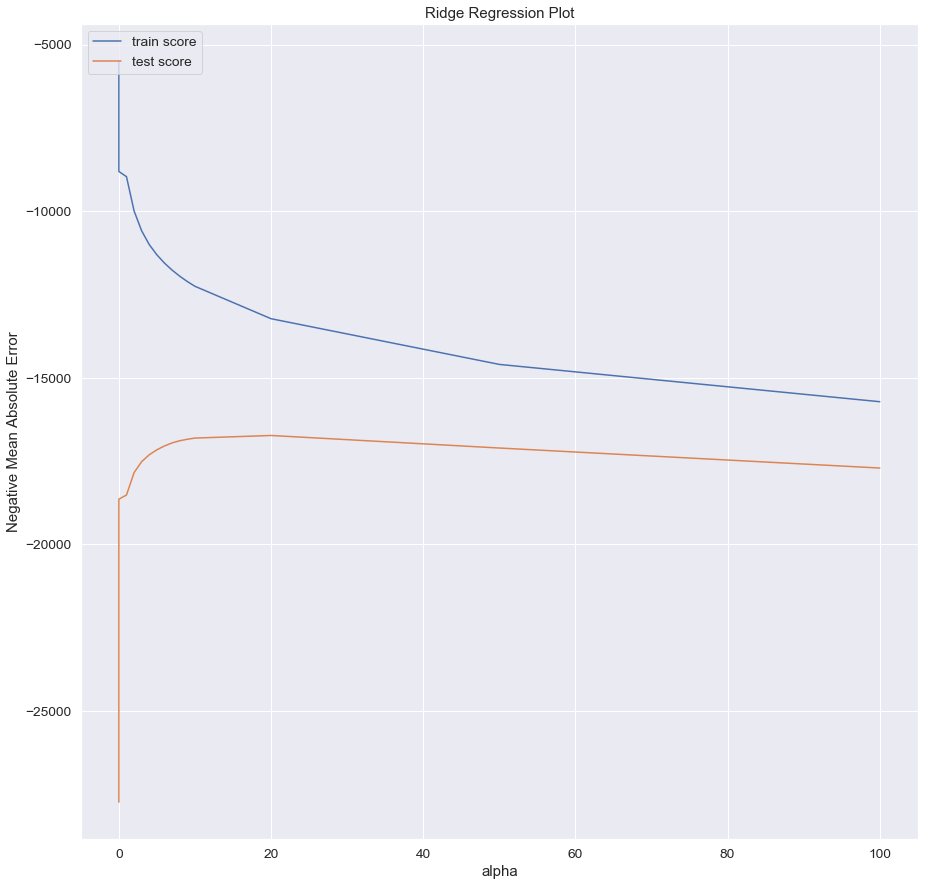

In [48]:
# With the given value plot the graph to check with test and train data

cross_validation['param_alpha'] = cross_validation['param_alpha'].astype('int32')

# Extract data for plotting
alpha_values = cross_validation['param_alpha']
mean_train_scores = cross_validation['mean_train_score']
mean_test_scores = cross_validation['mean_test_score']

# Plotting
fig, ax = plt.subplots()
ax.plot(alpha_values, mean_train_scores, label='train score')
ax.plot(alpha_values, mean_test_scores, label='test score')
ax.set_xlabel('alpha')
ax.set_ylabel('Negative Mean Absolute Error')
ax.set_title("Ridge Regression Plot")
ax.legend(loc='upper left')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [49]:
# try different alpha values

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    print(f'Ridge Regression (alpha={alpha}): R^2 score on training set = {r2_score(y_train, y_train_pred)}')

Ridge Regression (alpha=0.0001): R^2 score on training set = 0.9849828121719653
Ridge Regression (alpha=0.001): R^2 score on training set = 0.9849814762986185
Ridge Regression (alpha=0.01): R^2 score on training set = 0.9849442082267642
Ridge Regression (alpha=0.05): R^2 score on training set = 0.9844889668739617
Ridge Regression (alpha=0.1): R^2 score on training set = 0.983667653637725
Ridge Regression (alpha=0.2): R^2 score on training set = 0.9819012645507824
Ridge Regression (alpha=0.3): R^2 score on training set = 0.9802077048249405
Ridge Regression (alpha=0.4): R^2 score on training set = 0.9786315059315367
Ridge Regression (alpha=0.5): R^2 score on training set = 0.9771688711827525
Ridge Regression (alpha=0.6): R^2 score on training set = 0.9758085843493294
Ridge Regression (alpha=0.7): R^2 score on training set = 0.9745391560959522
Ridge Regression (alpha=0.8): R^2 score on training set = 0.973350288041642
Ridge Regression (alpha=0.9): R^2 score on training set = 0.97223306719

### The optimal value of lambda for Ridge regression is "6"

### Lasso Regression

In [50]:
lasso = Lasso()

# Define the grid search parameters
param_grid = {'alpha': alphas}

# Create an instance of the GridSearchCV object
grid_search_lasso = GridSearchCV(estimator=lasso,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           return_train_score=True,
                           verbose=1
                          )


# Fit the GridSearchCV object to the training data
grid_search_lasso.fit(X_train, y_train)




Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   31.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [51]:
#checking the value of optimum number of parameters
print(grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)

{'alpha': 100}
-16382.129015834938


In [52]:
#Fitting lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
# Call the function on lasso regression model
metric_lasso = calc_metrics(lasso, X_train, y_train, X_test, y_test)

# Print the metrics
for metric in metric_lasso:
    print(metric)

0.9452935658187109
0.8613619169681844
371613983354.4431
334240853967.42584
19078.013542791232
27624.39089877584


#### Based on the above evaluation with the "R2"(Train = 0.9417168201810527,Test = 0.9149398925090564), the best alpha fit is "100"

In [54]:
cross_validation_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
cross_validations_lasso = cross_validation_lasso[cross_validation_lasso['param_alpha']<=1]
cross_validation_lasso.head(100)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.295831,0.014019,0.001787,3.938065e-04,0.0001,{'alpha': 0.0001},-27872.991343,-27135.568562,-31531.625329,-24155.600868,...,-27483.198392,2378.803651,26,-5686.738746,-5517.732679,-5050.277537,-5940.020030,-5333.025401,-5505.558879,302.912442
1,0.268881,0.004599,0.001715,3.914618e-04,0.001,{'alpha': 0.001},-27860.250488,-27112.288009,-31506.495193,-24131.403879,...,-27464.136501,2377.932247,25,-5686.866655,-5517.890651,-5050.452863,-5940.134720,-5333.180146,-5505.705007,302.891581
2,0.288317,0.020783,0.001201,3.992971e-04,0.01,{'alpha': 0.01},-27790.120774,-26899.980263,-31272.838178,-23941.117997,...,-27308.782727,2361.276602,24,-5689.074961,-5520.295833,-5053.128179,-5942.553199,-5335.583315,-5508.127097,302.790891
3,0.264233,0.017720,0.001551,4.595172e-04,0.05,{'alpha': 0.05},-27608.310097,-26579.536915,-30764.502159,-23768.365255,...,-27054.057887,2250.753790,23,-5700.501552,-5532.387409,-5065.617158,-5953.781978,-5347.446011,-5519.946822,302.370533
4,0.243115,0.021050,0.002105,2.090510e-04,0.1,{'alpha': 0.1},-27272.773896,-26302.498046,-30602.241519,-23609.316942,...,-26832.564705,2247.717110,22,-5714.239697,-5546.858772,-5080.233160,-5967.928780,-5362.745362,-5534.401154,302.052172
5,0.222839,0.005497,0.001606,4.940489e-04,0.2,{'alpha': 0.2},-26705.864842,-25788.485147,-30260.750623,-23342.328013,...,-26423.556067,2228.935634,21,-5741.975480,-5576.437337,-5109.256191,-5998.178430,-5390.951142,-5563.359716,302.349684
6,0.246991,0.029734,0.001598,4.887241e-04,0.3,{'alpha': 0.3},-26213.480264,-25373.473293,-29942.693286,-23152.422751,...,-26071.874050,2197.585705,20,-5767.374664,-5605.027489,-5137.913878,-6026.694264,-5417.260476,-5590.854154,302.194187
7,0.253360,0.022042,0.002196,3.972716e-04,0.4,{'alpha': 0.4},-25772.445085,-25141.954702,-29657.192628,-22951.346305,...,-25778.681022,2171.894308,19,-5793.249315,-5636.030218,-5167.525494,-6054.078633,-5442.939460,-5618.764624,301.586649
8,0.280221,0.016973,0.001799,3.989949e-04,0.5,{'alpha': 0.5},-25355.113236,-24936.267350,-29383.510162,-22767.097217,...,-25505.685052,2146.484358,18,-5819.930924,-5666.232135,-5197.079330,-6081.549619,-5472.302369,-5647.418875,300.684335
9,0.251512,0.015218,0.001903,5.138027e-04,0.6,{'alpha': 0.6},-24996.205272,-24732.588125,-29122.445441,-22588.741009,...,-25251.517961,2124.820598,17,-5849.379735,-5695.705158,-5227.250183,-6110.654876,-5500.005455,-5676.599081,300.573575


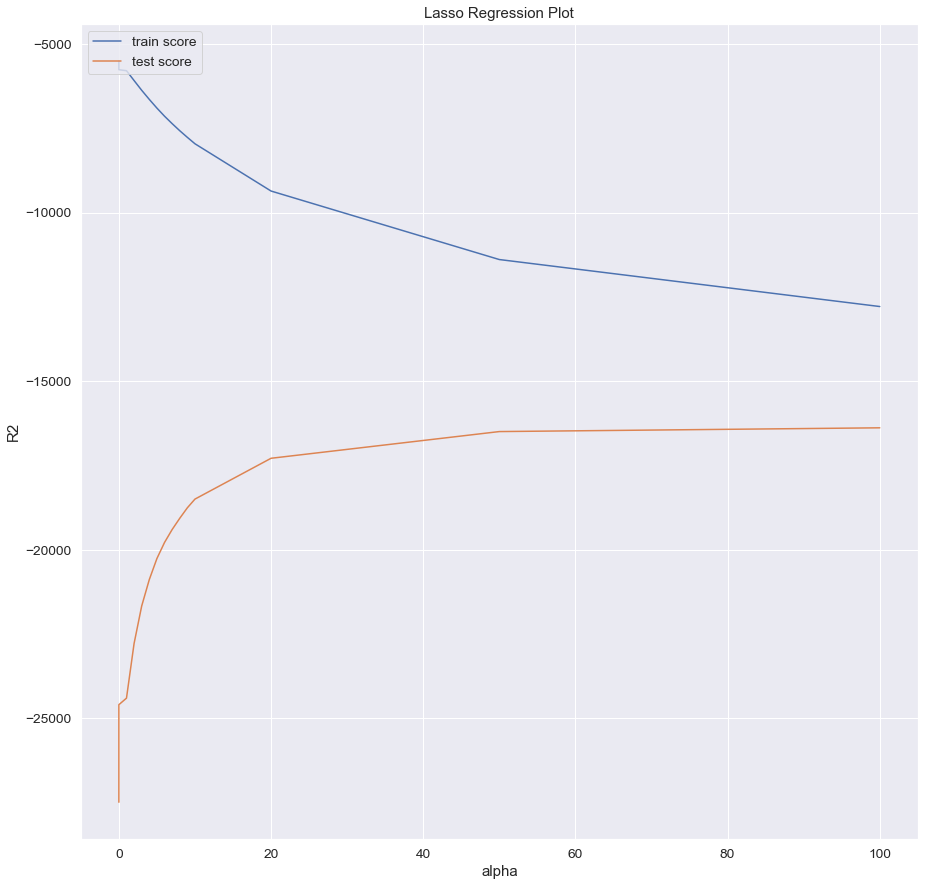

In [55]:
# With the given value plot the graph to check with test and train data

cross_validation_lasso['param_alpha'] = cross_validation_lasso['param_alpha'].astype('int32')

# Extract data for plotting
alpha_values = cross_validation_lasso['param_alpha']
mean_train_scores = cross_validation_lasso['mean_train_score']
mean_test_scores = cross_validation_lasso['mean_test_score']

# Plotting
fig, ax = plt.subplots()
ax.plot(alpha_values, mean_train_scores, label='train score')
ax.plot(alpha_values, mean_test_scores, label='test score')
ax.set_xlabel('alpha')
ax.set_ylabel('R2')
ax.set_title("Lasso Regression Plot")
ax.legend(loc='upper left')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()


In [56]:
lasso.coef_

array([-5.50929889e+03,  4.92647871e+03,  1.13576422e+04,  7.89881355e+03,
        1.87899821e+03,  6.76004381e+03,  0.00000000e+00, -0.00000000e+00,
        1.41926009e+04,  0.00000000e+00,  7.50151756e+03, -2.61000008e+03,
        2.44577994e+04,  1.60897283e+03, -8.41829510e+02,  1.10118439e+03,
       -0.00000000e+00, -4.77705102e+03, -3.49984454e+03,  1.82818719e+03,
        2.39481948e+03,  4.93659986e+03,  1.88770887e+03,  8.92970242e+02,
        7.17648518e+01, -3.36407751e+02,  5.23536550e+02,  3.45603466e+02,
        4.60586843e+03, -7.24311062e+02, -1.04383167e+04,  0.00000000e+00,
        0.00000000e+00,  2.60447790e+03, -2.55169434e+03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

### The optimal value of lambda for lasso regression is "100"

## Compare the regression model results

In [57]:
# Create a dictionary for linear regression metrics
lr_table = {
    'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'],
    'Linear Regression': metric_lm
}

# Convert the dictionary to a DataFrame for linear regression metrics
lr_metric = pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])

# Create a Series for Ridge Regression metrics
rg_metric = pd.Series(metric_ridge, name='Ridge Regression')

# Create a Series for Lasso Regression metrics
ls_metric = pd.Series(metric_lasso, name='Lasso Regression')

# Concatenate the three metrics DataFrames together
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
print(final_metric)

             Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.847436e-01      9.280648e-01      9.452936e-01
1   R2 Score (Test)      -1.272337e+23      8.559866e-01      8.613619e-01
2       RSS (Train)       1.036348e+11      4.886468e+11      3.716140e+11
3        RSS (Test)       3.067461e+35      3.472001e+11      3.342409e+11
4       MSE (Train)       1.007488e+04      2.187684e+04      1.907801e+04
5        MSE (Test)       2.646382e+16      2.815483e+04      2.762439e+04


In [58]:
# Create a DataFrame to store the coefficients
coefficients = pd.DataFrame(index=X.columns)

# Set the index of the DataFrame
coefficients.index = X.columns

# Add the coefficient values for each model to the DataFrame
coefficients['Linear'] = lm.coef_
coefficients['Ridge'] = ridge.coef_
coefficients['Lasso'] = lasso.coef_

# Display all rows of the DataFrame
pd.set_option('display.max_rows', None)

# Display the first 50 rows of the DataFrame
print(coefficients.head(50))


                        Linear         Ridge         Lasso
MSSubClass       -6.666740e+03  -4739.999876  -5509.298894
LotArea           7.592586e+03   3666.958172   4926.478712
OverallQual       7.734654e+03  14493.026883  11357.642247
OverallCond       7.083122e+03   6338.083393   7898.813545
YearRemodAdd      1.418103e+03   2923.329939   1878.998212
BsmtFinSF1       -2.381962e+17   8525.291705   6760.043812
BsmtFinSF2       -9.231681e+16    635.324552      0.000000
BsmtUnfSF        -2.412931e+17   1789.603528     -0.000000
TotalBsmtSF       2.359949e+17  10683.123623  14192.600946
1stFlrSF         -1.261874e+17   6870.467771      0.000000
2ndFlrSF         -1.435709e+17   9736.906011   7501.517561
LowQualFinSF     -1.557088e+16  -2089.749473  -2610.000080
GrLivArea         1.700958e+17  13124.159058  24457.799399
BsmtFullBath      2.248000e+03   1981.504895   1608.972828
BsmtHalfBath      1.760000e+02   -516.844879   -841.829510
FullBath          3.280000e+03   3232.747949   1101.1843

### Based on the above evaluation, Ridge regression R2 is good when compared with Linear and Lasso.

### The below calculation is for the subjective questions

### Considering lasso regression for the calculaton

In [59]:
#Fitting Ridge model for alpha = 40 and printing coefficients which have been penalised
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# Call the function on ridge regression model
metric_ridge = calc_metrics(ridge, X_train, y_train, X_test, y_test)

# Print the metrics
for metric in metric_ridge:
    print(metric)


0.9159318060693291
0.8567137485373711
571064754768.381
345447066226.88794
23649.92715890121
28083.659519814337


In [60]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# Call the function on ridge regression model
metric_ridge = calc_metrics(ridge, X_train, y_train, X_test, y_test)

# Print the metrics
for metric in metric_ridge:
    print(metric)

0.9280648085769806
0.8559866331590271
488646782195.42285
347200059774.37354
21876.843024538448
28154.82552597535


In [61]:
#Fitting lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Call the function on lasso regression model
metric_lasso = calc_metrics(lasso, X_train, y_train, X_test, y_test)

# Print the metrics
for metric in metric_lasso:
    print(metric)

0.9452935658187109
0.8613619169681844
371613983354.4431
334240853967.42584
19078.013542791232
27624.39089877584


In [62]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 201762.056),
 ('MSSubClass', -5509.299),
 ('LotArea', 4926.479),
 ('OverallQual', 11357.642),
 ('OverallCond', 7898.814),
 ('YearRemodAdd', 1878.998),
 ('BsmtFinSF1', 6760.044),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 14192.601),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 7501.518),
 ('LowQualFinSF', -2610.0),
 ('GrLivArea', 24457.799),
 ('BsmtFullBath', 1608.973),
 ('BsmtHalfBath', -841.83),
 ('FullBath', 1101.184),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', -4777.051),
 ('KitchenAbvGr', -3499.845),
 ('TotRmsAbvGrd', 1828.187),
 ('Fireplaces', 2394.819),
 ('GarageCars', 4936.6),
 ('GarageArea', 1887.709),
 ('WoodDeckSF', 892.97),
 ('OpenPorchSF', 71.765),
 ('EnclosedPorch', -336.408),
 ('3SsnPorch', 523.537),
 ('ScreenPorch', 345.603),
 ('PoolArea', 4605.868),
 ('MoSold', -724.311),
 ('Age', -10438.317),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 2604.478),
 ('MSZoning_RM', -2551.694),
 ('LotFrontage_24.0', -0.0),
 ('LotFrontage_30.0', 0.0),
 

In [63]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head(10)

,Variable,Coeff
0,constant,201762.056
1,MSSubClass,-5509.299
2,LotArea,4926.479
3,OverallQual,11357.642
4,OverallCond,7898.814
5,YearRemodAdd,1878.998
6,BsmtFinSF1,6760.044
7,BsmtFinSF2,0.000
8,BsmtUnfSF,-0.000
9,TotalBsmtSF,14192.601


In [64]:
lasso_list = pd.DataFrame(para[(para['Coeff'] != 0)])
print(lasso_list)

                  Variable       Coeff
0                 constant  201762.056
1               MSSubClass   -5509.299
2                  LotArea    4926.479
3              OverallQual   11357.642
4              OverallCond    7898.814
5             YearRemodAdd    1878.998
6               BsmtFinSF1    6760.044
9              TotalBsmtSF   14192.601
11                2ndFlrSF    7501.518
12            LowQualFinSF   -2610.000
13               GrLivArea   24457.799
14            BsmtFullBath    1608.973
15            BsmtHalfBath    -841.830
16                FullBath    1101.184
18            BedroomAbvGr   -4777.051
19            KitchenAbvGr   -3499.845
20            TotRmsAbvGrd    1828.187
21              Fireplaces    2394.819
22              GarageCars    4936.600
23              GarageArea    1887.709
24              WoodDeckSF     892.970
25             OpenPorchSF      71.765
26           EnclosedPorch    -336.408
27               3SsnPorch     523.537
28             ScreenPorc

In [65]:
lasso_list.sort_values(by=['Coeff'])

,Variable,Coeff
547,MasVnrArea_762.0,-288662.149
580,BsmtQual_Gd,-26780.146
581,BsmtQual_TA,-20067.489
614,KitchenQual_Gd,-18988.303
615,KitchenQual_TA,-17523.149
613,KitchenQual_Fa,-12785.585
170,Neighborhood_Mitchel,-11500.534
633,GarageYrBlt_1918.0,-10876.236
31,Age,-10438.317
569,ExterQual_TA,-9823.734


#### Based on the above table, leaving the categorial parameters
#### The top 10 important preditor varaibles are
1. GrLivArea
2. TotalBsmlSF
3. OverallQual
4. OverallCond
5. BSMlFinSF1
6. GarageCars
7. LotArea
8. PoolArea
9. Fireplaces
10. Garage Area

#### The top 5  preditor varaibles that are having negative impact are
1. Age
2. MSSubclass
3. BedroomAbvGr
4. BsmthalfBath
5. Mosold

In [66]:
#Fitting lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Call the function on lasso regression model
metric_lasso = calc_metrics(lasso, X_train, y_train, X_test, y_test)

# Print the metrics
for metric in metric_lasso:
    print(metric)

0.9265905703026267
0.8602776173845114
498661098897.7461
336854978534.6289
22099.87787863286
27732.20679026566


In [67]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head(10)
lasso_list = pd.DataFrame(para[(para['Coeff'] != 0)])
print(lasso_list)


                  Variable       Coeff
0                 constant  208453.656
1               MSSubClass   -5695.137
2                  LotArea    3873.169
3              OverallQual   12988.620
4              OverallCond    7676.715
5             YearRemodAdd    2017.805
6               BsmtFinSF1    6728.752
7               BsmtFinSF2    -102.237
9              TotalBsmtSF   13581.271
11                2ndFlrSF    6648.759
12            LowQualFinSF   -2464.458
13               GrLivArea   24998.607
14            BsmtFullBath    1349.820
15            BsmtHalfBath    -499.774
16                FullBath     979.812
18            BedroomAbvGr   -4895.671
19            KitchenAbvGr   -3313.212
20            TotRmsAbvGrd    2292.408
21              Fireplaces    2605.448
22              GarageCars    4157.874
23              GarageArea    2116.071
24              WoodDeckSF     841.458
26           EnclosedPorch    -243.549
27               3SsnPorch     502.196
28             ScreenPorc

In [68]:
lasso_list.sort_values(by=['Coeff'])

,Variable,Coeff
547,MasVnrArea_762.0,-178622.025
580,BsmtQual_Gd,-25209.554
581,BsmtQual_TA,-18162.714
614,KitchenQual_Gd,-15433.736
615,KitchenQual_TA,-13106.578
31,Age,-10933.424
129,LotFrontage_130.0,-9261.938
719,GarageYrBlt_2007.0,-8001.131
170,Neighborhood_Mitchel,-6656.489
569,ExterQual_TA,-6533.451
